In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Math
from data_analysis_codes.tools import Cstyle
from data_analysis_codes.tools import Amplitudes as A
plt.style.use(Cstyle.style1)
import math

In [2]:
h = 1 #0.6737
exp='LCDM'
c = 1
H0 = c*h/2997.9
Omega_m0 = 0.3147
Omega_l0 = 1 - Omega_m0
zR = 0
a0 = 1+zR

In [3]:
def pert(Ti, Lambda_pert, Amp):
    Rc, delta, delta1, dK, dK1, dgdet, dgdet1, R, R1 = [], [], [], [], [], [], [], [], []
    for ti, lambda_pert, amp in zip(Ti, Lambda_pert, Amp):
        Rci, deltai, delta1i, dKi, dK1i, dgdeti, dgdet1i, Ri, R1i = A.f_Amp(h, ti, lambda_pert, amp, zR, expansion=exp)
        Rc += [Rci]
        delta += [deltai]
        delta1 += [delta1i]
        dK += [dKi]
        dK1 += [dK1i]
        dgdet += [dgdeti]
        dgdet1 += [dgdet1i]
        R += [Ri]
        R1 += [R1i]
    Rc = np.array(Rc)
    dgdet = np.array(dgdet)
    dgdet1 = np.array(dgdet1)
    dK = np.array(dK)
    dK1 = np.array(dK1)
    delta = np.array(delta)
    delta1 = np.array(delta1)
    R = np.array(R)
    R1 = np.array(R1)
    return Rc, [dgdet, dgdet1, dK, dK1, delta, delta1, R, R1]

def get_delt(Amp, ti, L):
    A = np.array([Amp])
    Rc, [dgdet, dgdet1, dK, dK1, delta, delta1, R, R1] = pert([ti]*len(A), [L]*len(A), A)
    return [delta, delta1]

def plot(x, varslist):
    lw = 4
    dgdet, dgdet1, dK, dK1, delta, delta1, R, R1 = varslist
    plt.loglog(x, abs(dgdet), linewidth=lw, color='C0', linestyle='-', label=r'$|\delta\gamma_{IN,\;OD}|$')
    plt.loglog(x, abs(dgdet1), linewidth=lw*0.5, color='C0', linestyle='-')#, label=r'$|\delta\gamma_{IN,\;OD}^{(1)}|$')
    plt.loglog(x, abs(dK), linewidth=lw, color='C1', linestyle='--', label=r'$|\delta K_{IN,\;OD}|$')
    plt.loglog(x, abs(dK1), linewidth=lw*0.5, color='C1', linestyle='--')#, label=r'$|\delta K_{IN,\;OD}^{(1)}|$')
    plt.loglog(x, abs(delta), linewidth=lw, color='C2', linestyle=':', label=r'$|\delta_{IN,\;OD}|$')
    plt.loglog(x, abs(delta1), linewidth=lw*0.5, color='C2', linestyle=':')#, label=r'$|\delta_{IN,\;OD}^{(1)}|$')
    plt.loglog(x, abs(R), linewidth=lw, color='C3', linestyle='-.', label=r'$|^{(3)}R_{IN,\;OD}|\;[h^{2}$'+'Mpc'+r'${}^{-2}]$')
    plt.loglog(x, abs(R1), linewidth=lw*0.5, color='C3', linestyle='-.')#, label=r'$|^{(3)}R_{IN,\;OD}^{(1)}|$')
    plt.grid()

def a(t):
    if exp=='EdS':
        return a0*(3*t*H0/2)**(2/3)
    elif exp=='LCDM':
        return a0 * ( Omega_m0 / Omega_l0 )**(1/3) * np.sinh( 3 * H0 * np.sqrt(Omega_l0) * t / 2 )**(2/3)
def z(t):
    return -1 + (a0/a(t))
def H(t):
    if exp=='EdS':
        return 2/(3*t)
    elif exp=='LCDM':
        return H0 * np.sqrt( Omega_m0 * ( a(t) / a0 )**(-3) + Omega_l0 )

def tfromH(Hl):
    if exp=='EdS':
        return 2/(3*Hl)
    elif exp=='LCDM':
        return tfroma(afromH_LCDM(Hl))
    
    
def afromH_LCDM(Hl):
    return a0 * (((Hl / H0)**2 - Omega_l0)/Omega_m0)**(-1/3)

def tfroma(a):
    if exp=='EdS':
        return (2/(3*H0)) * (a/a0)**(3/2)
    elif exp=='LCDM':
        A = 2/(3 *H0*np.sqrt(Omega_l0))
        B = np.sqrt((Omega_m0/Omega_l0)*(a/a0)**(-3)+1)
        tloc= A*np.arctanh(1/B)
        #print(A, B, tloc)
        return tloc
def afromz(z):
    aloc = a0/(1+z)
    #print(aloc)
    return aloc
def tfromz(z):
    #print(z)
    return tfroma(afromz(z))

#def L_trans(t):
    #return 2*np.pi/(a(t)*H(t)*np.sqrt(3*F))

def Z_trans(L):
    k2 = (2*np.pi/L)**2
    return -1+k2/(3*F*(H0**2)*(a0**2))

def T_cross(L):
    return tfromz(-1+(L*H0/c)**(2/3))

def L_cross(T):
    return c/H(T)

def Lphy(L, T):
    return a(T)*L

def LpertfromLphy(Lphy, T):
    return Lphy/a(T)

def power(a):
    if np.sign(np.log(a)/np.log(10))>0:
        return math.ceil(np.log(a)/np.log(10))
    else:
        return math.floor(np.log(a)/np.log(10))
    
def latex_float(f):
    float_str = "{0:.2g}".format(f)
    if "e" in float_str:
        base, exponent = float_str.split("e")
        if int(float(base))==1:
            return r"10^{{{}}}".format(int(exponent))
        else:
            return r"{0} \times 10^{{{1}}}".format(base, int(exponent))
    else:
        return float_str

nonlinearity =  0.010863586585433627 [array([0.00586299]), array([0.00579998])]
h = 1
zR = 0
expansion = LCDM


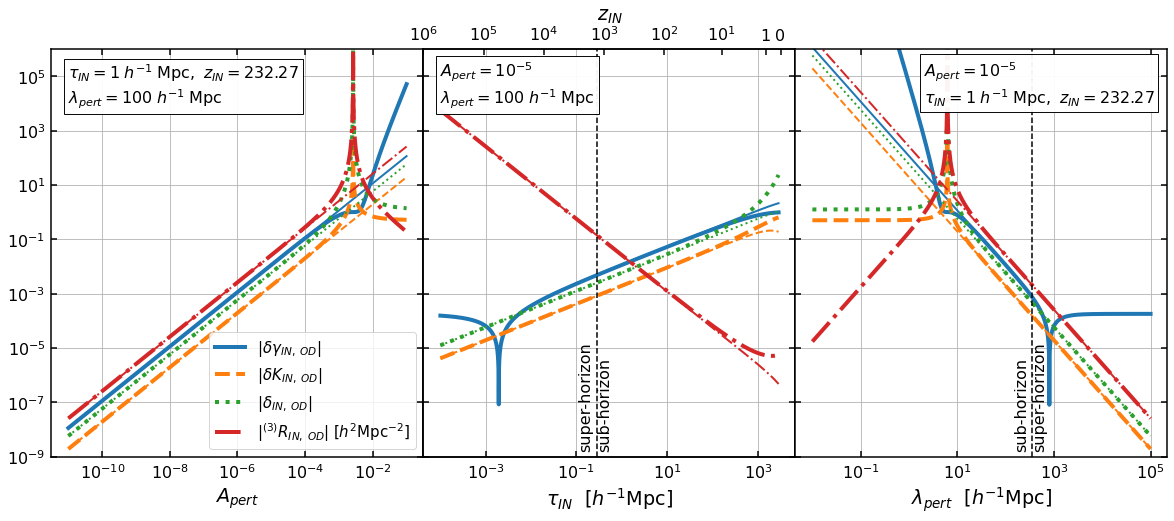

In [61]:
plt.figure(figsize=(20, 7.5))
Amps_fix = 1e-5
Ti_fix = 1 #0.05
Zi_fix = z(Ti_fix)
Lambda_pert_fix = 100
L = Lambda_pert_fix

Amp_pow = power(Amps_fix)
T_pow = power(Ti_fix)
Z_pow = power(Zi_fix)
L_pow = power(Lambda_pert_fix)

dummy = get_delt(Amps_fix, Ti_fix, Lambda_pert_fix)
delta = dummy[0]
print('nonlinearity = ', abs(delta/dummy[1]-1)[0], dummy)
ymin = 10**(power(delta)-6)
ymax = 10**(power(delta)+9)

A_str = r'$A_{pert}=$'+r'${}$'.format(latex_float(Amps_fix))
T_str = r'$\tau_{IN}=$'+str(Ti_fix)+r'$\;h^{-1}\;$'+'Mpc,'+r'$\;\;z_{IN}=$'+'{:.2f}'.format(Zi_fix)
L_str = r'$\lambda_{pert}=$'+str(Lambda_pert_fix)+r'$\;h^{-1}\;$'+'Mpc'
texty = abs(ymax-9.9*10**(power(ymax)-1))

# ================================================================================
# ================================================================================
axA = plt.subplot(131)
Amps = np.logspace(Amp_pow-6, Amp_pow+4, 10000)
Rc, varslist = pert(np.array([Ti_fix]*len(Amps)), np.array([Lambda_pert_fix]*len(Amps)), Amps)
#plt.axvline(x=Amps_fix, c='m', linewidth=3)
plot(Amps, varslist)
plt.xlabel(r'$A_{pert}$')
plt.text(min(Amps), texty, T_str+'\n'+L_str, bbox=dict(facecolor='white', alpha=0.95))
plt.ylim(ymin, ymax)

# ================================================================================
# ================================================================================
axB = plt.subplot(132)
Ti = np.logspace(T_pow-4, T_pow+4, 10000)[:-682]
Rc, varslist = pert(Ti, np.array([Lambda_pert_fix]*len(Ti)), np.array([Amps_fix]*len(Ti)))
#plt.axvline(x=Ti_fix, c='m', linewidth=3)
plot(Ti, varslist)
plt.gca().set_yticklabels([])
plt.xlabel(r'$\tau_{IN}$'+'  '+r'$[h^{-1}$'+'Mpc'+r'$]$')
plt.text(min(Ti), texty, A_str+'\n'+L_str, bbox=dict(facecolor='white', alpha=0.95))
plt.ylim(ymin, ymax)

# long wavelength transition
Lambda_phIN = a(Ti_fix)*Lambda_pert_fix
Tcross = tfromH(1/Lambda_phIN)
plt.axvline(x=Tcross, c='k', linewidth=1.5, linestyle='--')
plt.text(Tcross-1.75*10**(power(Tcross)), ymin+10**(power(ymin)), 'super-horizon', rotation=90)
plt.text(Tcross, ymin+10**(power(ymin)), 'sub-horizon', rotation=90)

# 2nd horizontal axis
tmin, tmax = plt.gca().get_xlim()
axBt = axB.twiny()
axBt.set_xscale("log")
axBt.set_xlim(axB.get_xlim())
pz = np.arange(power(z(tmin)), -1, -1)
Zs = np.append(10**pz, 0)
axBt.set_xticks(np.append(tfromz(10**pz), tfromz(0)))
Zs_str = [r'$10^{:.0f}$'.format(power(zi)) if zi>1 else str(zi) for zi in Zs]
axBt.set_xticklabels(Zs_str)
axBt.set_xlabel(r'$z_{IN}$')

# ================================================================================
# ================================================================================
axC = plt.subplot(133)
Lambda_pert = np.logspace(L_pow-4, L_pow+3, 10000)
Rc, varslist = pert(np.array([Ti_fix]*len(Lambda_pert)), Lambda_pert, np.array([Amps_fix]*len(Lambda_pert)))
#plt.axvline(x=Lambda_pert_fix, c='m', linewidth=3)
plot(Lambda_pert, varslist)
plt.gca().set_yticklabels([])
plt.xlabel(r'$\lambda_{pert}$'+'  '+r'$[h^{-1}$'+'Mpc'+r'$]$')
textx = abs(max(Lambda_pert)-9.9998*10**(power(max(Lambda_pert))-1))
plt.text(textx, texty, A_str+'\n'+T_str, bbox=dict(facecolor='white', alpha=0.95))
plt.ylim(ymin, ymax)

# long wavelength transition
#plt.axvline(x=L_trans(Ti_fix), c='y', linestyle='-.', linewidth=3)
Lcross = c/(a(Ti_fix)*H(Ti_fix))
plt.axvline(x=Lcross, c='k', linewidth=1.5, linestyle='--')
plt.text(abs(Lcross-2*10**(power(Lcross)-1)), ymin+10**(power(ymin)), 'sub-horizon', rotation=90)
plt.text(Lcross, ymin+10**(power(ymin)), 'super-horizon', rotation=90)

# ================================================================================
# ================================================================================
plt.subplots_adjust(wspace=0)
axA.legend(loc='lower right', fontsize=15)
plt.savefig('/home/robynm/simulations/Plots/PertAmp_t1_A1e5_L100_h1_zR0_LCDM.pdf', bbox_inches = 'tight')

print('h =', h)
print('zR =', zR)
print('expansion =', exp)
#print('z_transition = ', Z_trans(Lambda_pert_fix))
#print('L_transition = ', L_trans(Ti_fix))
#print('t_cross = ', T_cross(Lambda_pert_fix))

In [6]:
get_delt(1e-4, 1, 1821)

[array([0.00029585]), array([0.00029615])]

In [61]:
tmax/(100*dt)

array([748.47796661])

In [62]:
L = 1821 --> Nit = 6136 --> 61
L = 100 --> Nit = 41906 --> 83

SyntaxError: invalid syntax (<ipython-input-62-5f0c26937749>, line 1)

In [ ]:
L = 100
N = 16
dx = L/N
t = 1
dtmax = a(t)*dx
dt = 0.0006*dx
print(dx, dt, dtmax)
#113.8125 0.06828749999999999 0.37495802880603035
print(z(1), z(1000))

In [ ]:
0.06828749999999999/0.37495802880603035

In [ ]:
0.00375/0.020590775881715012

In [9]:
L = 1821
At = 1
Ab = 1e-12
Am = np.average([At, Ab])
dtarget = 7.5e-4
#L     A_{pert}                \delta                  \delta^{(1)}
#1821, 0.01138486133517004756, 0.02999999999999958256, 0.03371677061380019130
#1821, 0.00025391606168433177, 0.00074999999999980638, 0.00075198365223148162
#1206, 0.01068203445570103244, 0.03000000000000024869, 0.03337044315364871838
ti = 1
dm = get_delt(Am, ti, L)[0][0]
N = 0
while N<1e5 and abs(dm/dtarget-1)>1e-15:
    if abs(get_delt(At, ti, L)[0][0]-dtarget)>abs(get_delt(Ab, ti, L)[0][0]-dtarget):
        At = Am
    elif abs(get_delt(At, ti, L)[0][0]-dtarget)<abs(get_delt(Ab, ti, L)[0][0]-dtarget):
        Ab = Am
    Am = np.average([At, Ab])
    dm = get_delt(Am, ti, L)[0][0]
    N+=1

d, d1 = get_delt(Am, ti, L)
print('{:.20f}, {:.20f}, {:.20f}'.format(Am, d[0], d1[0]))

0.00025391606168433177, 0.00074999999999980638, 0.00075198365223148162


In [ ]:
1206/128

In [ ]:
Ti = np.logspace(T_pow-9, T_pow+5, 10000)

plt.subplot(111)
plt.loglog(Ti, np.arange(len(Ti)))

axt = plt.subplot(111).twiny()
axt.set_xscale("log")
axt.set_xlim(plt.subplot(111).get_xlim())
Z = np.array([1e-4, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4, 1e5, 1e6, 1e7, 1e8])
axt.set_xticks(tfromz(Z))
Zpow = [int(np.log(zi)/np.log(10)) for zi in Z]
axt.set_xticklabels([r'$10^{}$'.format(zipow) for zipow in Zpow])
#axt.set_xlabel(r'$z_{IN}$')
#axt.ticklabel_format(axis="x", style="sci")#, scilimits=(0,0))

#secax = plt.subplot(132).secondary_xaxis('top', functions=(z, tfromz))
#secax = plt.subplot(132).secondary_xaxis('top', functions=(tfromz, z))
#secax.set_xlabel(r'$z_{IN}$')


In [ ]:
10**np.array([0, 1, 2]), 10**(-1)

In [ ]:
np.arange(5, -1, -1)

In [ ]:
t = np.logspace(-4, 4, 10000)

rHS = c/H(t)
lambda_phy = a(t)*Lambda_pert_fix

lw=2
plt.loglog(z(t), rHS, 'b', linewidth=lw, label=r'$c/H$')
plt.loglog(z(t), lambda_phy, 'k', linewidth=lw, label=r'$\lambda_{phy}$')
plt.axhline(y=Lambda_pert_fix, c='k', linewidth=lw*0.75, linestyle='--', label=r'$\lambda_{com}$')

plt.gca().invert_xaxis()
plt.xlabel(r'$z$')
plt.ylabel('Mpc')
plt.grid()
plt.legend()
#plt.text(min(z)+60, Lambda_pert_fix+0.2, r'$\lambda_{pert}=1$Mpc', bbox=dict(facecolor='white', edgecolor='none', alpha=0))

#plt.savefig('/home/robynm/ET/pflrwcodes/Plots/Compare_L/Wavelength_Hubble')